In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./dataset/train.csv')
df_test = pd.read_csv('./dataset/test.csv')
df.head(2)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458


In [2]:
df_test.head(5)

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2


In [3]:
df.shape

(32165, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  32165 non-null  int64  
 1   name_of_drug                32165 non-null  object 
 2   use_case_for_drug           32165 non-null  object 
 3   review_by_patient           32165 non-null  object 
 4   effectiveness_rating        32165 non-null  int64  
 5   drug_approved_by_UIC        32165 non-null  object 
 6   number_of_times_prescribed  32165 non-null  int64  
 7   base_score                  32165 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.0+ MB


In [5]:
columns = list(df.columns)
columns

['patient_id',
 'name_of_drug',
 'use_case_for_drug',
 'review_by_patient',
 'effectiveness_rating',
 'drug_approved_by_UIC',
 'number_of_times_prescribed',
 'base_score']

In [6]:
#checking NaN values

print([print(i, df[i].isnull().sum()) for i in columns])

patient_id 0
name_of_drug 0
use_case_for_drug 0
review_by_patient 0
effectiveness_rating 0
drug_approved_by_UIC 0
number_of_times_prescribed 0
base_score 0
[None, None, None, None, None, None, None, None]


In [7]:
#dublicate values
df[df.duplicated()]

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score


### Exploring data
 

In [8]:
#Exploring data
df.name_of_drug.value_counts()

Levonorgestrel                       724
Etonogestrel                         628
Ethinyl estradiol / norethindrone    547
Ethinyl estradiol / norgestimate     425
Nexplanon                            397
                                    ... 
Ephedrine / guaifenesin                1
Xalkori                                1
Methscopolamine                        1
Brimonidine / timolol                  1
Didrex                                 1
Name: name_of_drug, Length: 2220, dtype: int64

In [9]:
df.use_case_for_drug.value_counts()

Birth Control                                    5795
Depression                                       1791
Pain                                             1273
Anxiety                                          1174
Acne                                             1101
                                                 ... 
amilial Mediterranean Feve                          1
Pre-Exposure Prophylaxis                            1
Oligospermia                                        1
Mycobacterium avium-intracellulare, Treatment       1
92</span> users found this comment helpful.         1
Name: use_case_for_drug, Length: 636, dtype: int64

In [10]:
df.number_of_times_prescribed.value_counts()

2      1270
3      1255
0      1255
4      1237
1      1205
       ... 
238       1
297       1
282       1
215       1
559       1
Name: number_of_times_prescribed, Length: 303, dtype: int64

In [11]:
df.base_score.value_counts()

7.170997    292
8.745991    281
6.493653    281
6.173134    260
8.074493    258
           ... 
8.530035      1
6.505984      1
7.770829      1
8.592949      1
5.874253      1
Name: base_score, Length: 1383, dtype: int64

In [12]:
numerical_columns = df.select_dtypes('number').columns
categorical_columns = df.select_dtypes('object').columns
numerical_columns,categorical_columns

(Index(['patient_id', 'effectiveness_rating', 'number_of_times_prescribed',
        'base_score'],
       dtype='object'),
 Index(['name_of_drug', 'use_case_for_drug', 'review_by_patient',
        'drug_approved_by_UIC'],
       dtype='object'))

In [13]:
df['review_by_patient'][0]

'"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"'

### Remove punctuation

In [14]:
df1=df.copy()
#library that contains punctuation
import string
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df1['review_by_patient_new']= df1['review_by_patient'].apply(lambda x:remove_punctuation(x))
df1.head()

##storing the puntuation free text in Test DF
df_test['review_by_patient_new'] = df_test['review_by_patient'].apply(lambda x:remove_punctuation(x))
# df_test.head(3)

### LowerCase

In [15]:
#LowerCase text into train and test DF
df1['review_by_patient_new']= df1['review_by_patient_new'].apply(lambda x: x.lower())
df1.head(5)

df_test['review_by_patient_new']= df_test['review_by_patient_new'].apply(lambda x: x.lower())


In [16]:
df1['review_by_patient_new']

0        it has no side effect i take it in combination...
1        my son is halfway through his fourth week of i...
2        i used to take another oral contraceptive whic...
3        suboxone has completely turned my life around ...
4        2nd day on 5mg started to work with rock hard ...
                               ...                        
32160    i have been taking cymbalta for 15 months now ...
32161    i have had the nexplanon since dec 27 2016 \r\...
32162    had panic attacks and social anxiety starting ...
32163    i have been off prozac for about 4 weeks nowaf...
32164    limited improvement after 4 months developed b...
Name: review_by_patient_new, Length: 32165, dtype: object

In [17]:
df_test['review_by_patient_new']

0        i039ve tried a few antidepressants over the ye...
1        contrave combines drugs that were used for alc...
2        4 days in on first 2 weeks  using on arms and ...
3        ive been on methadone for over ten years and c...
4        ditto on rebound sleepless when discontinued i...
                               ...                        
10755    i took chantix a little over a month it made m...
10756    this medicine kept me from sleeping the whole ...
10757    i have taken tamoxifen for 5 years side effect...
10758    i039m married 34 years old and i have no kids ...
10759                                             it works
Name: review_by_patient_new, Length: 10760, dtype: object

### Tokenization

In [18]:
# Tokenization
#defining function for tokenization using regex module
import re
def tokenization(text):
    words_pattern = '[a-z]+'
    tokens = re.findall(words_pattern, text)
    return tokens
#applying function to the train and test DF
df1['review_by_patient_new']= df1['review_by_patient_new'].apply(lambda x: tokenization(x))
df_test['review_by_patient_new']= df_test['review_by_patient_new'].apply(lambda x: tokenization(x))

df1.head(5)


,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,review_by_patient_new
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969,"[it, has, no, side, effect, i, take, it, in, c..."
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458,"[my, son, is, halfway, through, his, fourth, w..."
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969,"[i, used, to, take, another, oral, contracepti..."
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176,"[suboxone, has, completely, turned, my, life, ..."
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782,"[nd, day, on, mg, started, to, work, with, roc..."


In [19]:
df_test['review_by_patient_new']

0        [i, ve, tried, a, few, antidepressants, over, ...
1        [contrave, combines, drugs, that, were, used, ...
2        [days, in, on, first, weeks, using, on, arms, ...
3        [ive, been, on, methadone, for, over, ten, yea...
4        [ditto, on, rebound, sleepless, when, disconti...
                               ...                        
10755    [i, took, chantix, a, little, over, a, month, ...
10756    [this, medicine, kept, me, from, sleeping, the...
10757    [i, have, taken, tamoxifen, for, years, side, ...
10758    [i, m, married, years, old, and, i, have, no, ...
10759                                          [it, works]
Name: review_by_patient_new, Length: 10760, dtype: object

### Stop word remove


In [20]:

#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')


In [21]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [22]:
#applying the function on train and test DF
df1['review_by_patient_new']= df1['review_by_patient_new'].apply(lambda x:remove_stopwords(x))

df1.head(5)

df_test['review_by_patient_new']= df_test['review_by_patient_new'].apply(lambda x:remove_stopwords(x))


### Lemmatization

In [23]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [24]:
df_test.head(3)

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating,review_by_patient_new
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10,"[tried, antidepressants, years, citalopram, fl..."
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9,"[contrave, combines, drugs, used, alcohol, smo..."
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4,"[days, first, weeks, using, arms, face, put, v..."


In [25]:
#defining the function for lemmatization on train and test DF
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return " ".join(lemm_text)
df1['review_by_patient_new']=df1['review_by_patient_new'].apply(lambda x:lemmatizer(x))
df_test['review_by_patient_new']=df_test['review_by_patient_new'].apply(lambda x:lemmatizer(x))


df1.head(5)

df_test.head(3)

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating,review_by_patient_new
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10,tried antidepressant year citalopram fluoxetin...
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9,contrave combine drug used alcohol smoking opi...
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4,day first week using arm face put vaseline lip...


In [26]:
# nltk.download('vader_lexicon')

### SentimentIntensityAnalyzer

Using sentimentAnalysis, I can analysis Good or bad the review of patient using df['review_by_patient']   

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [28]:
def sentimentAnalysis(text):
    emptyline=[]
    for row in text:

        vs=analyzer.polarity_scores(row)
        emptyline.append(vs)
    # Creating new dataframe with sentiments
    df_sentiments=pd.DataFrame(emptyline)
    df_sentiments.head()
    return df_sentiments
    
df1_sentiments = sentimentAnalysis(df1['review_by_patient_new'])
df_test_sentiments = sentimentAnalysis(df_test['review_by_patient_new'])

df1_sentiments

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.035,0.750,0.215,0.9169
2,0.040,0.824,0.136,0.8176
3,0.111,0.584,0.306,0.9403
4,0.252,0.613,0.135,-0.6908
...,...,...,...,...
32160,0.307,0.510,0.183,-0.8750
32161,0.000,0.891,0.109,0.7184
32162,0.408,0.446,0.146,-0.9794
32163,0.146,0.612,0.242,0.8417


In [29]:
df_test_sentiments

,neg,neu,pos,compound
0,0.162,0.552,0.287,0.7623
1,0.097,0.697,0.206,0.8173
2,0.112,0.685,0.203,0.3818
3,0.098,0.760,0.142,0.2023
4,0.195,0.805,0.000,-0.5574
...,...,...,...,...
10755,0.000,0.872,0.128,0.3612
10756,0.000,1.000,0.000,0.0000
10757,0.229,0.647,0.125,-0.8225
10758,0.215,0.742,0.043,-0.8994


In [30]:
df_c = pd.concat([df1.reset_index(drop=True), df1_sentiments], axis=1)
# for the test dataset
df_test_c = pd.concat([df_test.reset_index(drop=True), df_test_sentiments], axis=1)

df_c.head(3)
# df_test_c.head(3)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,review_by_patient_new,neg,neu,pos,compound
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969,side effect take combination bystolic mg fish oil,0.000,1.000,0.000,0.0000
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458,son halfway fourth week intuniv became concern...,0.035,0.750,0.215,0.9169
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969,used take another oral contraceptive pill cycl...,0.040,0.824,0.136,0.8176


In [31]:
# Convert scores into 1 and 0 sentiments using some threshold
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 ,1,0)
#for the test dataset
df_test_c['Sentiment'] = np.where(df_test_c['compound'] >= 0 ,1,0)


df_c.head(5)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,review_by_patient_new,neg,neu,pos,compound,Sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969,side effect take combination bystolic mg fish oil,0.000,1.000,0.000,0.0000,1
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458,son halfway fourth week intuniv became concern...,0.035,0.750,0.215,0.9169,1
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969,used take another oral contraceptive pill cycl...,0.040,0.824,0.136,0.8176,1
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176,suboxone completely turned life around feel he...,0.111,0.584,0.306,0.9403,1
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782,nd day mg started work rock hard erection howe...,0.252,0.613,0.135,-0.6908,0


### PLOTING CHART FOR GOOD AND BAD REVIEWS

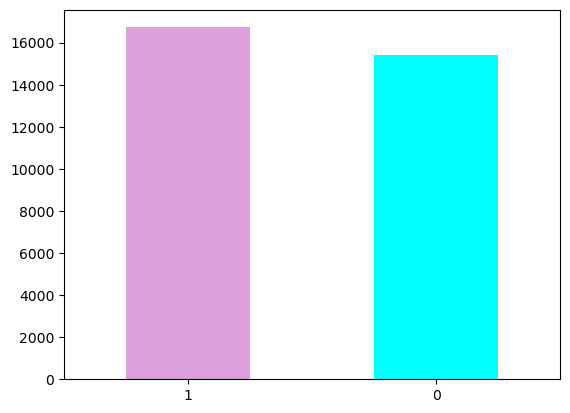

In [32]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['plum','cyan']);

#### this visualitzation shows, 
1. there are 16000+ positive and 14000+ negetives reviews.
2. dataset is balanced dataset

In [33]:
#Dropping unneccesry columns
df_c.drop(['patient_id', 'name_of_drug','use_case_for_drug','review_by_patient','drug_approved_by_UIC','review_by_patient_new','neg','neu','pos','compound'],axis=1, inplace=True)
df_c.head(4)

#droping test dataset columns
df_test_c.drop(['name_of_drug','use_case_for_drug','review_by_patient','drug_approved_by_UIC','review_by_patient_new','neg','neu','pos','compound'],axis=1, inplace=True)


### Ploting correlation


<AxesSubplot:>

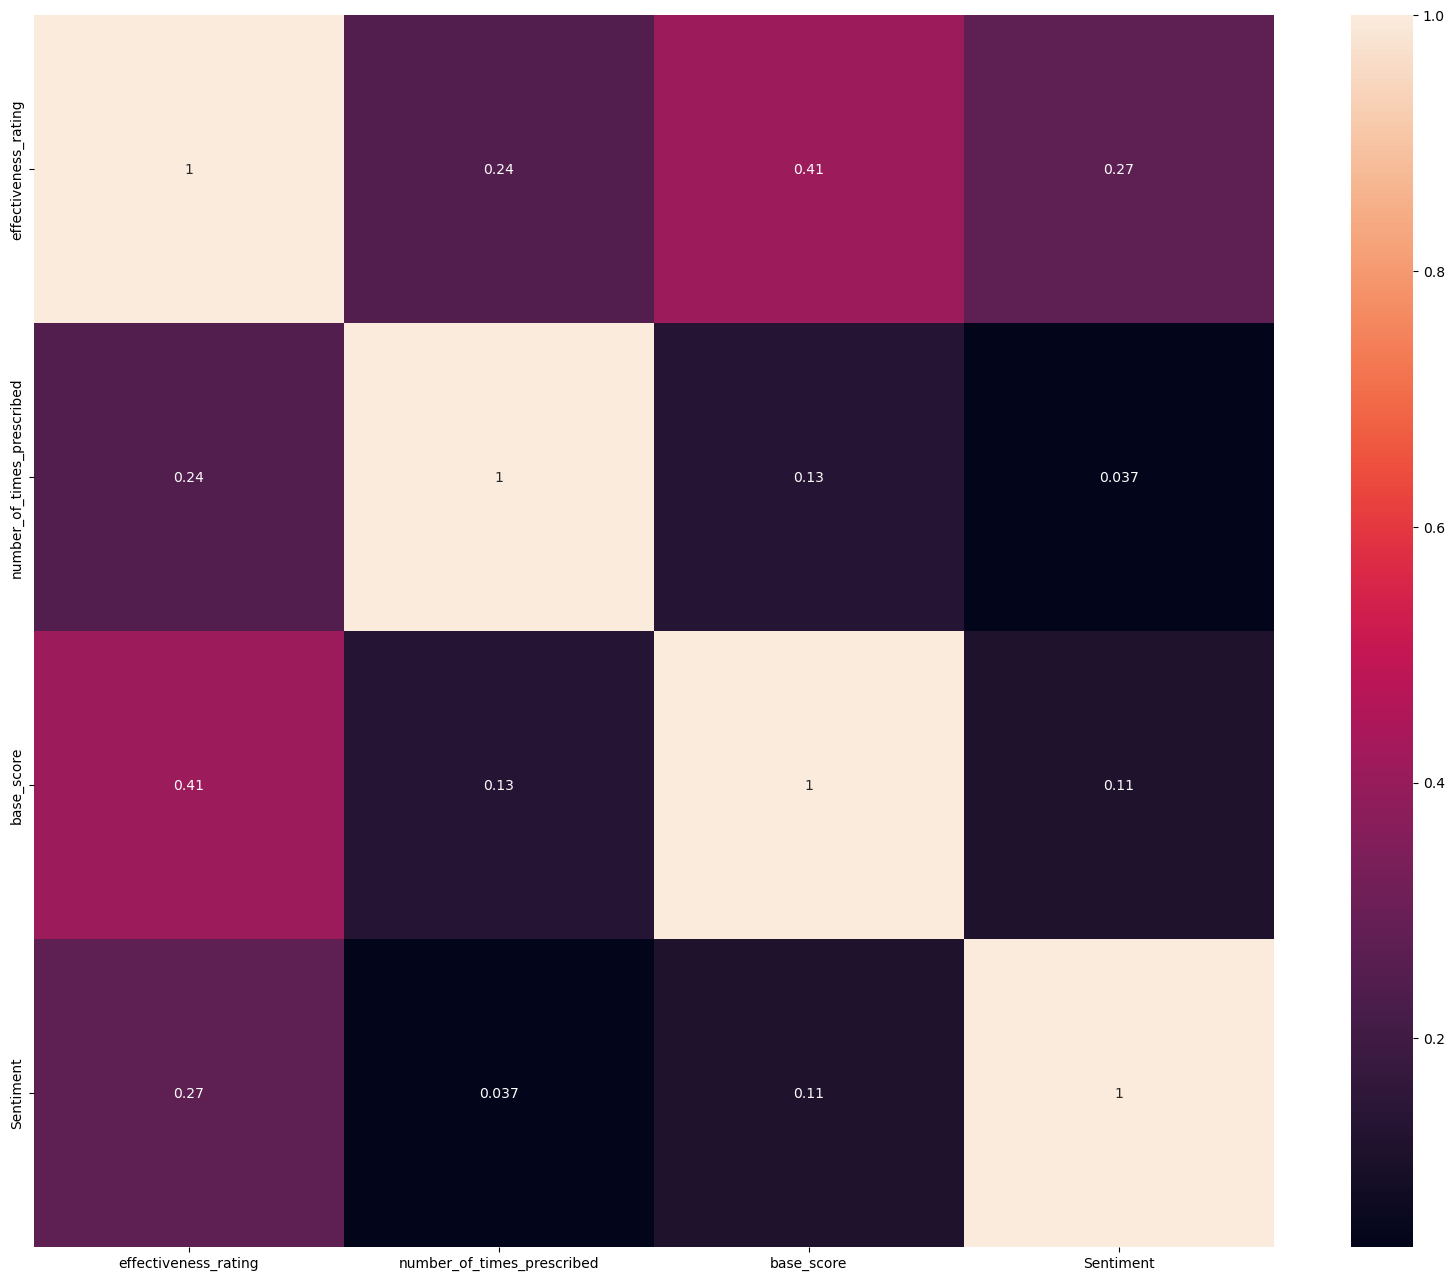

In [34]:
#Ploting correlation
import matplotlib.pyplot as plt
import seaborn as sns
tc = df_c.corr() 

plt.figure(figsize=(20,16))
sns.heatmap(tc, annot = True)

In this correlation matrix, There are no fetures which are correlated to each other 

In [35]:
# Create independent and dependent(Target) variable
X= df_c[['effectiveness_rating','number_of_times_prescribed','Sentiment']]
y= df_c.base_score
X,y

(       effectiveness_rating  number_of_times_prescribed  Sentiment
 0                         9                          27          1
 1                         8                         192          1
 2                         5                          17          1
 3                         9                          37          1
 4                         2                          43          0
 ...                     ...                         ...        ...
 32160                     9                          89          0
 32161                     6                           0          1
 32162                     9                          25          0
 32163                     8                          22          1
 32164                     2                          35          0
 
 [32165 rows x 3 columns],
 0        8.022969
 1        7.858458
 2        6.341969
 3        6.590176
 4        6.144782
            ...   
 32160    6.963020
 32161    0.899076
 32

### Scaling

scaling feature values in particular range for better performance

In [48]:
from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()
X= sc.fit_transform(X)
y= y.values.reshape(-1,1)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
from sklearn.model_selection import train_test_split as split

X_train, X_test, y_train, y_test = split(X,y, test_size=0.2,random_state=0)

In [38]:
X_train


array([[1.        , 0.0311284 , 1.        ],
       [0.11111111, 0.04409857, 1.        ],
       [0.77777778, 0.04539559, 0.        ],
       ...,
       [1.        , 0.00648508, 0.        ],
       [1.        , 0.01167315, 0.        ],
       [0.77777778, 0.03631647, 0.        ]])

In [39]:

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25732, 3)
(25732, 1)
(6433, 3)
(6433, 1)


### Model building using Best accuracy algo

target variable shows that it is regrassion problem 

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('Random Forest', RandomForestRegressor())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
# print(classification_report(y_test, y_pred))
print(clf.score(X_test, y_test))

C:\Users\Heshvi\anaconda3\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


0.993205992949615


In [41]:
y_pred, y_test

(array([8.6715799 , 8.58048062, 6.17313446, ..., 6.29083469, 8.21548291,
        3.784504  ]),
 array([[8.6715799 ],
        [8.58048062],
        [6.17313446],
        ...,
        [6.29083469],
        [8.21548291],
        [3.784504  ]]))

In [42]:
df_test_c.head(4)

,patient_id,number_of_times_prescribed,effectiveness_rating,Sentiment
0,163740,22,10,1
1,39293,35,9,1
2,208087,13,4,1
3,23295,21,7,1


In [43]:
df_test_c[['number_of_times_prescribed','effectiveness_rating','Sentiment']]

,number_of_times_prescribed,effectiveness_rating,Sentiment
0,22,10,1
1,35,9,1
2,13,4,1
3,21,7,1
4,44,2,0
...,...,...,...
10755,2,1,1
10756,18,1,1
10757,43,10,0
10758,7,8,0


In [44]:
final_output = clf.predict(df_test_c[['number_of_times_prescribed','effectiveness_rating','Sentiment']])
final_output

C:\Users\Heshvi\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([7.41528374, 7.41528374, 7.41528374, ..., 7.31443336, 7.31443336,
       7.41528374])

In [45]:
len(final_output)
final_output

array([7.41528374, 7.41528374, 7.41528374, ..., 7.31443336, 7.31443336,
       7.41528374])

In [46]:
data = {
    'patient_id':df_test_c['patient_id'],
    'base_score':final_output
}
len(df_test_c['patient_id'])

10760

In [47]:
final_df = pd.DataFrame(data)
final_df

,patient_id,base_score
0,163740,7.415284
1,39293,7.415284
2,208087,7.415284
3,23295,7.415284
4,97013,7.314433
...,...,...
10755,151266,7.415284
10756,139347,7.415284
10757,159999,7.314433
10758,130945,7.314433
